Author: Arend-Jan Quist\
Date of creation: 27 February 2020\
Last modified: 15 June 2020

Measure the time duration of the drizzle algorithm for multiple ranges of parameters.

The code below is executed on a device with the following specifications:


Processor: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz\
RAM memory: 8.00 GB \
Operating system: Windows 10 Home version 1903\
Numpy version: 1.18.1

In [1]:
import numpy as np

import timeit

import matplotlib.pyplot as plt

# Calculate duration for multiple n_inputs

In [15]:
N_runs = 100 #number of runs per parameter

n_inputs = [1,10,20,30,40,50,60,70,80,90,100]

times_n_inputs = []

for n_input in n_inputs:
    setup = """
from Drizzle import drizzle
import numpy as np

n_input = """+str(n_input) +""" #number of input images
size = [100,100] #size of the input images

shifts = np.random.normal(2,2,[n_input,2])
ims = np.random.uniform(14000,24000,[n_input,size[0],size[1]])
"""
    code = """drizzle(ims,shifts,p=0.5,n=1)"""
    
    time = timeit.timeit(setup = setup, 
                            stmt = code, 
                            number = N_runs) / N_runs
    
    times_n_inputs.append([n_input,time])



In [17]:
times_n_inputs

[[1, 0.0016140970000003564],
 [10, 0.0027292040000003225],
 [20, 0.0065575189999998425],
 [30, 0.01084484400000008],
 [40, 0.01154921800000011],
 [50, 0.014537693999999988],
 [60, 0.017731999999999744],
 [70, 0.019893761000000156],
 [80, 0.023560390999999754],
 [90, 0.025887668000000304],
 [100, 0.031056825000000003]]

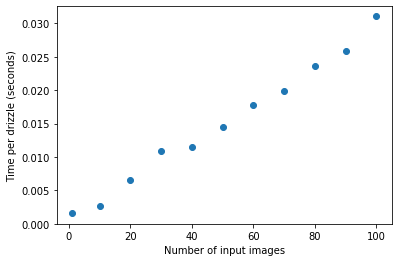

In [6]:
plt.plot(np.array(times_n_inputs)[:,0],np.array(times_n_inputs)[:,1],"o")
plt.xlabel("Number of input images")
plt.ylabel("Time per drizzle (seconds)")
plt.ylim(bottom=0)
plt.show()

# Calculate duration for multiple n (=1/scalefactor)

In [5]:
N_runs = 10 #number of runs per parameter

n_s = [1,2,3,4,5,6,7]

times_n = []

for n in n_s:
    setup = """
from Drizzle import drizzle
import numpy as np

n_input = 25 #number of input images
size = [100,100] #size of the input images

shifts = np.random.normal(2,2,[n_input,2])
ims = np.random.uniform(14000,24000,[n_input,size[0],size[1]])
"""
    code= """drizzle(ims,shifts,p=0.5,n="""+str(n)+""")"""
    
    time = timeit.timeit(setup = setup, 
                            stmt = code, 
                            number = N_runs) / N_runs
    
    times_n.append([n,time])



In [7]:
times_n

[[1, 0.01901483999999982],
 [2, 0.022066789999999514],
 [3, 0.10562068000000124],
 [4, 0.2512436000000008],
 [5, 0.39349023000000044],
 [6, 0.6186039499999992],
 [7, 0.9944269200000008]]

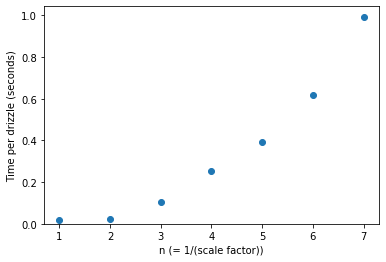

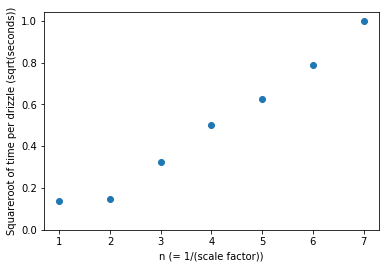

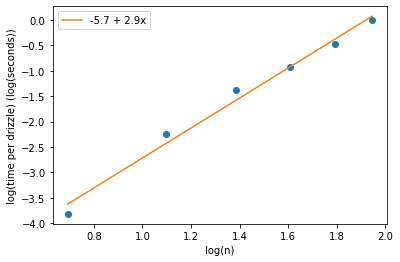

C:\Users\Arend-Jan\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


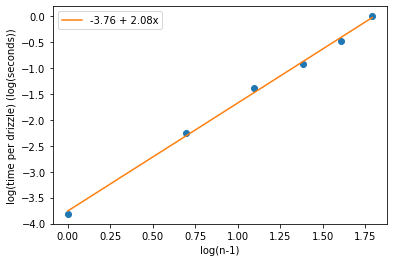

In [78]:
plt.plot(np.array(times_n)[:,0],np.array(times_n)[:,1],"o")
plt.xlabel("n (= 1/(scale factor))")
plt.ylabel("Time per drizzle (seconds)")
plt.ylim(bottom=0)
plt.show()

plt.plot(np.array(times_n)[:,0],np.array(times_n)[:,1]**0.5,"o")
plt.xlabel("n (= 1/(scale factor))")
plt.ylabel("Squareroot of time per drizzle (sqrt(seconds))")
plt.ylim(bottom=0)
plt.show()

x = np.log(np.array(times_n)[:,0])
y = np.log(np.array(times_n)[:,1])
x = x[1:]
y = y[1:]
a,b = np.polyfit(x,y,1)
#print(a,b)
plt.plot(x,y,"o")
plt.plot([min(x),max(x)],[min(x)*a+b,max(x)*a+b],label=str(np.round(b,1))+" + "+str(np.round(a,1))+"x")
plt.xlabel("log(n)")
plt.ylabel("log(time per drizzle) (log(seconds))")
plt.legend()
plt.show()

x = np.log(np.array(times_n)[:,0]-1)
y = np.log(np.array(times_n)[:,1])
x = x[1:]
y = y[1:]
a,b = np.polyfit(x,y,1)
#print(a,b)
plt.plot(x,y,"o")
plt.plot([min(x),max(x)],[min(x)*a+b,max(x)*a+b],label=str(np.round(b,2))+" + "+str(np.round(a,2))+"x")
plt.xlabel("log(n-1)")
plt.ylabel("log(time per drizzle) (log(seconds))")
plt.legend()
plt.show()

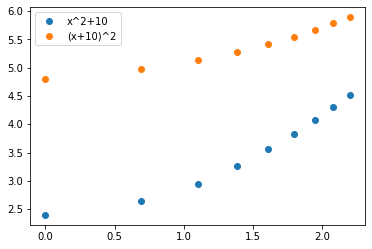

In [74]:
# Test to plot x^2+10 and (x+10)^2 on log-log scale
x=np.arange(1,10)
y=(x)**2+10
z=(x+10)**2
plt.plot(np.log(x),np.log(y),"o",label="x^2+10")
plt.plot(np.log(x),np.log(z),"o",label="(x+10)^2")
plt.legend()
plt.show()

#Conclusion: both x^2+10 and (x+10)^2 are non-linear on log-log scale.

# Calculate duration for multiple image sizes

In [132]:
N_runs = 100 #number of runs per parameter

sizes = [[40,100],[40,200],[40,300],[40,400],[40,500],[40,600],[40,700],[40,800],[40,900],[40,1000],
         [25,25],[50,50],[75,75],[100,100],[125,125],[150,150],[175,175],[200,200]]

times_size = []

for size in sizes:
    setup = """
from Drizzle import drizzle
import numpy as np

n_input = 25 #number of input images
size = """+str(size)+""" #size of the input images

shifts = np.random.normal(2,2,[n_input,2])
ims = np.random.uniform(14000,24000,[n_input,size[0],size[1]])
"""
    code= """drizzle(ims,shifts,p=0.5,n=1)"""
    
    time = timeit.timeit(setup = setup, 
                            stmt = code, 
                            number = N_runs) / N_runs
    
    n_pixels = size[0]*size[1]
    times_size.append([n_pixels,time,np.array(size)])



In [134]:
times_size

[[4000, 0.005748118999999861, array([ 40, 100])],
 [8000, 0.008931118000000425, array([ 40, 200])],
 [12000, 0.009498859000000266, array([ 40, 300])],
 [16000, 0.008908179999998538, array([ 40, 400])],
 [20000, 0.010844004000000495, array([ 40, 500])],
 [24000, 0.011517644000000472, array([ 40, 600])],
 [28000, 0.013070263999998133, array([ 40, 700])],
 [32000, 0.014424841000000015, array([ 40, 800])],
 [36000, 0.017426863999999112, array([ 40, 900])],
 [40000, 0.018932446000003437, array([  40, 1000])],
 [625, 0.0034460379999973157, array([25, 25])],
 [2500, 0.0042173300000013115, array([50, 50])],
 [5625, 0.0052582630000006245, array([75, 75])],
 [10000, 0.006713743999998769, array([100, 100])],
 [15625, 0.008705018000000564, array([125, 125])],
 [22500, 0.011084006999999474, array([150, 150])],
 [30625, 0.013663643999998386, array([175, 175])],
 [40000, 0.018451850999999807, array([200, 200])]]

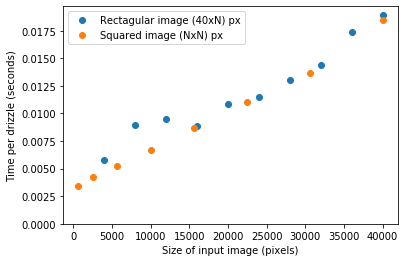

In [10]:
plt.plot(np.array(times_size)[:10,0],np.array(times_size)[:10,1],"o",label="Rectagular image (40xN) px")
plt.plot(np.array(times_size)[10:,0],np.array(times_size)[10:,1],"o",label="Squared image (NxN) px")
plt.xlabel("Size of input image (pixels)")
plt.ylabel("Time per drizzle (seconds)")
plt.legend()
plt.ylim(bottom=0)
plt.show()

# Performance of convolution-based and for-loop drizzle


In [5]:
N_runs = 10


setup = '''
from Drizzle import drizzle
import numpy as np

n_input = 10 #number of input images
size = [50,50] #size of the input images

shifts = np.random.normal(2,2,[n_input,2])
ims = np.random.uniform(14000,24000,[n_input,size[0],size[1]])
'''
  
code_conv = ''' 
drizzle(ims,shifts,p=0.5,n=1) 
'''
  
# timeit statement 
time_conv = timeit.timeit(setup = setup, 
                    stmt = code_conv, 
                    number = N_runs) / N_runs
print("Convolution based = ",time_conv)



# code snippet whose execution time is to be measured 
code_forl = ''' 
drizzle(ims,shifts,p=0.5,s=1) 
'''
  
# timeit statement 
time_forl = timeit.timeit(setup = setup, 
                    stmt = code_forl, 
                    number = N_runs) / N_runs
print("For-loop based = ",time_forl)

Convolution based =  0.014930090000000007
For-loop based =  2.38528486


# Difference between only_convolution and matrix_shifting


In [3]:
# code snippet to be executed only once 
setup = '''
from Drizzle import drizzle
import numpy as np

n_input = 100 #number of input images
size = [1024,1200] #size of the input images

shifts = np.random.normal(2,2,[n_input,2])
ims = np.random.uniform(14000,24000,[n_input,size[0],size[1]])
'''
  
# code snippet whose execution time is to be measured 
code_n1 = ''' 
drizzle(ims,shifts,p=0.5,n=1) 
'''
  
# timeit statement 
time_n1 = timeit.timeit(setup = setup, 
                    stmt = code_n1, 
                    number = 10)
print("only_convolution_time = ",time_n1)

# code snippet whose execution time is to be measured 
code_n1_msh = ''' 
drizzle(ims,shifts,p=0.5,n=1,matrix_shifting=True) 
'''
time_n1_msh = timeit.timeit(setup = mysetup, 
                    stmt = code_n1_msh, 
                    number = 10)
print("matrix_shift_time = ",time_n1_msh)


only_convolution_time =  79.8028647
matrix_shift_time =  96.1627205


Above is the time of 10 runs: to get time per run, divide by 10.